# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier with Cifar10

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Loading Cifar10 data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

Using TensorFlow backend.


Untaring file...


In [4]:
import pickle
import numpy as np
from numpy import newaxis
import cv2

# Review of data shapes

print('Data opened')
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

Data opened
X_train shape (50000, 32, 32, 3)
y_train shape (50000,)
X_test shape (10000, 32, 32, 3)
y_test shape (10000,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print('number of images in Y train set =', len(y_train))
print('number of images in Y test set =', len(y_test))

Number of training examples = 50000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10
number of images in Y train set = 50000
number of images in Y test set = 10000


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

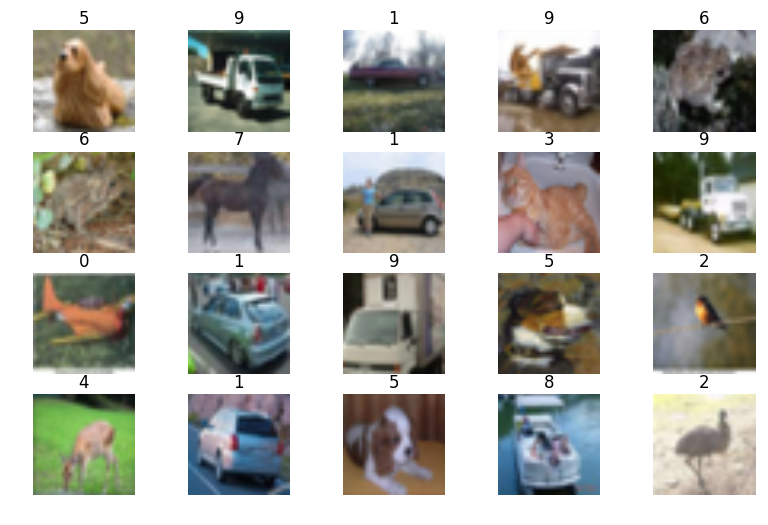

In [6]:
### visualizatio of signs and labels
import matplotlib.pyplot as plt
import random
from pandas.io.parsers import read_csv
%matplotlib inline

fig, axs = plt.subplots(4,5, figsize=(10,6))
fig.subplots_adjust(hspace = .2, wspace = .001)
axs = axs.ravel()

for i in range(20):
    i_random = random.randint(0,len(X_train))
    #print('Sign', i_random)
    axs[i].axis('off')
    axs[i].imshow(X_train[i_random])
    axs[i].set_title(y_train[i_random])

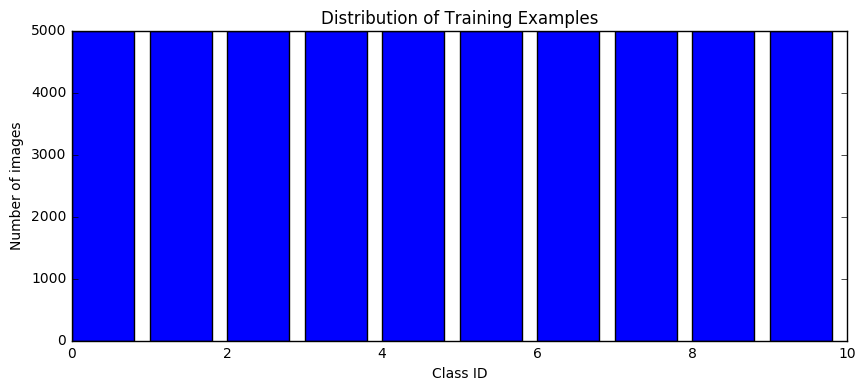

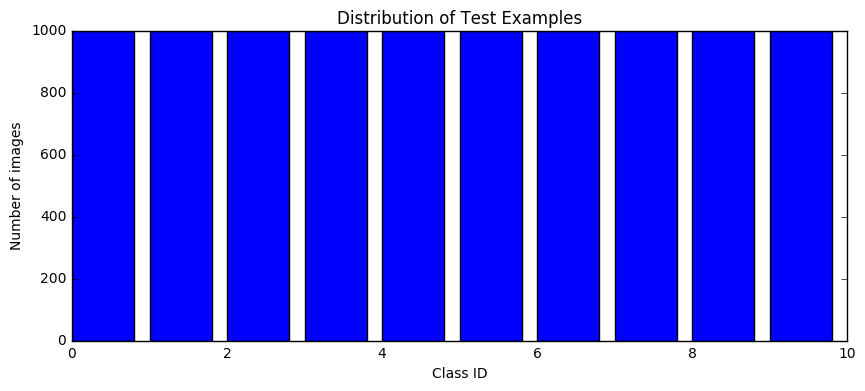

In [11]:
# Disribution of data in test, train and validation dataset

def distribution(class_labels, text):
    plt.figure(figsize=(10, 4))
    examples_per_class = np.bincount(class_labels)
    num_classes = len(examples_per_class)
    plt.bar(np.arange(num_classes), examples_per_class, 0.8, color='b', label='Inputs per class')
    plt.xlabel('Class ID')
    plt.ylabel('Number of images')
    plt.title(text)
    plt.show()   
    
distribution(y_train, 'Distribution of Training Examples')
#distribution(y_valid, 'Distribution of Validation Examples')
distribution(y_test, 'Distribution of Test Examples')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
# Convert to gray scale
def gray_scale(data):
    return np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in data])

X_train_gray = gray_scale(X_train)
X_test_gray = gray_scale(X_test)
#X_valid_gray = gray_scale(X_valid)

# Histogram Equalization
def histogram(data):
    return np.array([cv2.equalizeHist(image) for image in data])

X_train_hist = histogram(X_train_gray)
X_test_hist = histogram(X_test_gray)
#X_valid_hist = histogram(X_valid_gray)

# Reshape for conv layer
X_train_test = X_train_hist[..., newaxis]
X_test_test = X_test_hist[..., newaxis]
#X_valid_test = X_valid_hist[..., newaxis]
print('X_train_test shape after adding newaxis', X_train_test.shape)
print('X_test_test shape after adding newaxis', X_test_test.shape)

# Normalization with Gray Scale and Histogram
X_train_test = X_train_test / np.std(X_train_test, axis = 0)
X_test_test = X_test_test / np.std(X_test_test, axis = 0)
#X_valid_test = X_valid_test / np.std(X_valid_test, axis = 0)
print('X_train_test shape', X_train_test.shape)
print('X_test_test shape', X_test_test.shape)
#print('X_valid_test shape', X_valid_test.shape)

X_train = X_train_test
X_test = X_test_test
#X_valid = X_valid_test

print('X Train normalize', np.mean(X_train_test))
print('X Test normalize', np.mean(X_test_test))

print('len X_train  ', len(X_train_test))
print('len X_test  ',len(X_test_test))


print('TEST new axis') #
print('X_test', X_train_test[1].shape)
#print('X_valid', X_valid_test[1].shape)

X_train_test shape after adding newaxis (50000, 32, 32, 1)
X_test_test shape after adding newaxis (10000, 32, 32, 1)
X_train_test shape (50000, 32, 32, 1)
X_test_test shape (10000, 32, 32, 1)
X Train normalize 1.75263426727
X Test normalize 1.7532368084
len X_train   50000
len X_test   10000
TEST new axis
X_test (32, 32, 1)


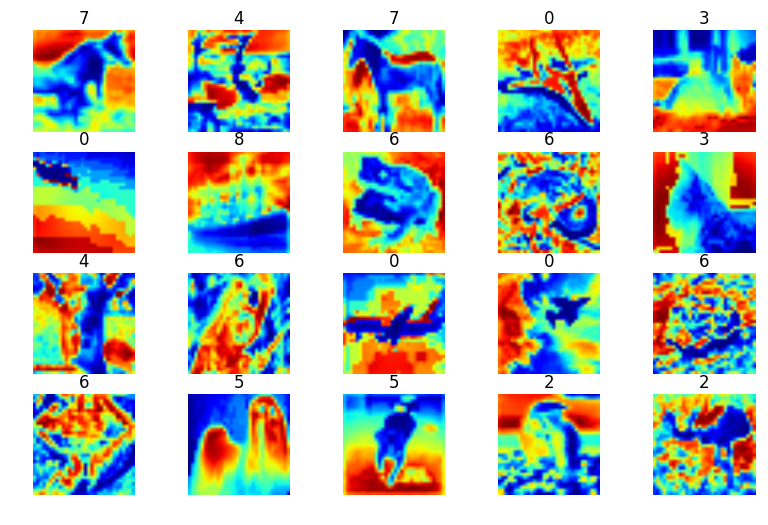

In [13]:
### visualizatio of signs and labels after pre processing

fig, axs = plt.subplots(4,5, figsize=(10,6))
fig.subplots_adjust(hspace = .2, wspace = .001)
axs = axs.ravel()

for i in range(20):
    i_random = random.randint(0,len(X_train))
    #print('Sign', i_random)
    axs[i].axis('off')
    axs[i].imshow(X_train[i_random].squeeze())
    axs[i].set_title(y_train[i_random])

### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# shuffle normalized data
X_train, y_train = shuffle(X_train, y_train)
print('Completed split and shuffle')

Completed split and shuffle


I have used Architecture from research paper Multi-Column Deep Neural Network for Traffic Sign Classification
http://people.idsia.ch/~juergen/nn2012traffic.pdf

- Layer 1: Convolutional. Input = 32x32x1. Output = 26x26x100.
         - Pooling. Input = 26x26x100. Output = 13x13x100.
- Layer 2: Convolutional. Output = 10x10x150.
         - Pooling. Input = 10x10x16. Output = 5x5x150.
- Layer 3: Fully Connected. Input = 250. Output = 200.
- Layer 4: Fully Connected. Input = 200. Output = 43.        

In [18]:
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 10
BATCH_SIZE = 192

from tensorflow.contrib.layers import flatten
def mcdnn(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
            
    # Layer 1: Convolutional. Input = 32x32x1. Output = 26x26x100.
    F_W = tf.Variable(tf.truncated_normal((7,7,1,100), mean = mu, stddev = sigma)) # Change W parameters
    F_b = tf.Variable(tf.zeros(100)) # is bias zero
    strides = 1
    conv1 = tf.nn.conv2d(x, F_W, strides=[1,strides,strides,1], padding = 'VALID') + F_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 26x26x100. Output = 13x13x100.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    print("Conv 1 shape:",conv1.get_shape())
    
    # Layer 2: Convolutional. Output = 10x10x150.
    F_W_conv2 = tf.Variable(tf.truncated_normal((4,4,100,150), mean = mu, stddev = sigma))
    F_b_conv2 = tf.Variable(tf.zeros(150))
    conv2 = tf.nn.conv2d(conv1,F_W_conv2, strides=[1,1,1,1],padding='VALID')+F_b_conv2
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x150.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    print("Conv 2 shape:",conv2.get_shape())
    
    ### Removed last convolutional layer from MCDNN network due i felt it was not needed for better accuracy
    ### After removal of this layer accuracy jumped
    '''
    # TODO: Layer 2: Convolutional. Output = 2x2x100.
    F_W_conv3 = tf.Variable(tf.truncated_normal((4,4,150,250), mean = mu, stddev = sigma))
    F_b_conv3 = tf.Variable(tf.zeros(250)) # is bias zero
    conv3 = tf.nn.conv2d(conv2,F_W_conv3, strides=[1,1,1,1],padding='VALID')+F_b_conv3
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
        
    # Pooling. Input = 10x10x16. Output = 1x1x250.
    conv3 = tf.nn.max_pool(conv3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    print("Conv 3 shape:",conv3.get_shape())
    '''
    # Flatten. Input = 3750. Output = 250.
    fc0 = flatten(conv2)
    print("fc0 shape:",fc0.get_shape())
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 250. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3750, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    print("fc1 shape:",fc1.get_shape())
    
    # Layer 4: Fully Connected. Input = 200. Output = 43.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
        
    logits = fc2
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on0 the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
# Note
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

# Note
rate = 0.001

logits = mcdnn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Conv 1 shape: (?, 13, 13, 100)
Conv 2 shape: (?, 5, 5, 150)
fc0 shape: (?, 3750)
fc1 shape: (?, 200)


In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './mcdnn_cifar') # I did not change name of saved model
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.300

EPOCH 2 ...
Validation Accuracy = 0.361

EPOCH 3 ...
Validation Accuracy = 0.404

EPOCH 4 ...
Validation Accuracy = 0.422

EPOCH 5 ...
Validation Accuracy = 0.464

EPOCH 6 ...
Validation Accuracy = 0.472

EPOCH 7 ...
Validation Accuracy = 0.492

EPOCH 8 ...
Validation Accuracy = 0.510

EPOCH 9 ...
Validation Accuracy = 0.519

EPOCH 10 ...
Validation Accuracy = 0.537

Model saved


### Evaluate Model 

In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.940


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

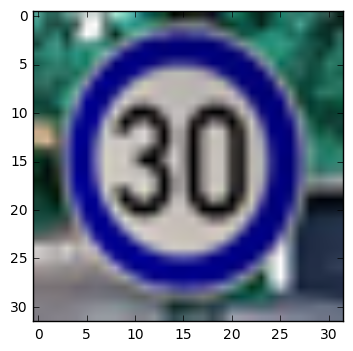

Images shape (32, 32, 3)


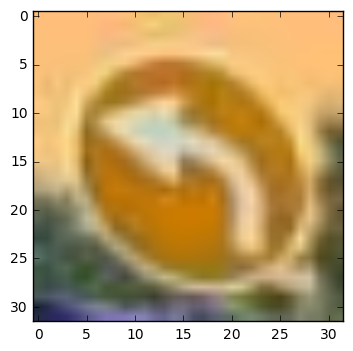

Images shape (32, 32, 3)


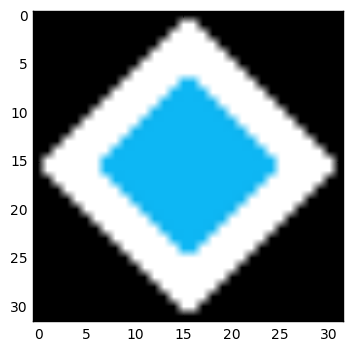

Images shape (32, 32, 3)


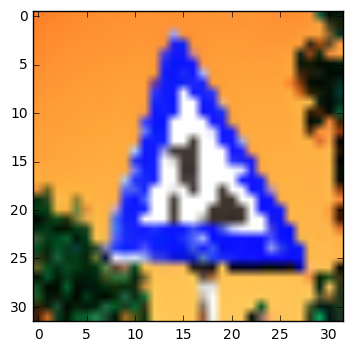

Images shape (32, 32, 3)


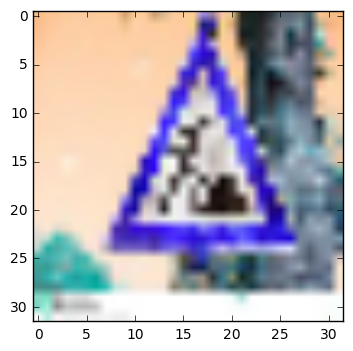

Images shape (32, 32, 3)


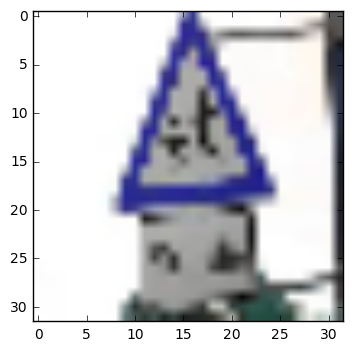

Images shape (32, 32, 3)


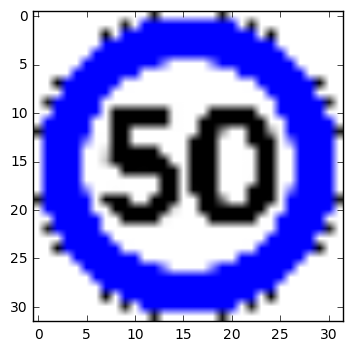

Images shape (32, 32, 3)


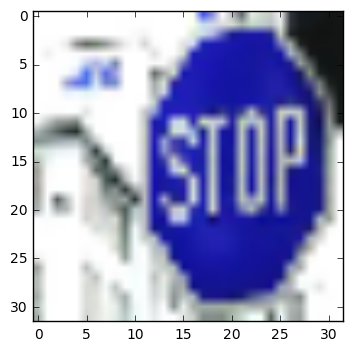

Images shape (32, 32, 3)


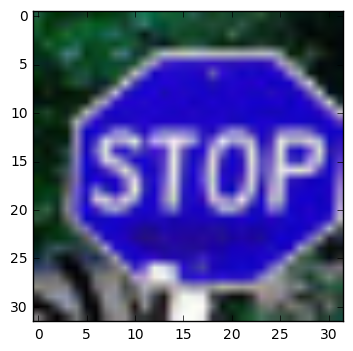

Images shape (32, 32, 3)


In [20]:
# I have several sign images of different sizes
# I will firs resize them to 32x32 size
import os
import cv2

# resize images to 32x32
def resize_newimage(image_name):
    image = cv2.imread(image_name)
    image = cv2.resize(image,(32,32))
    return image

images = np.array([resize_newimage('new_signs/'+ img_name) for img_name in os.listdir('new_signs')])

# show new images of new signs
for i,image in enumerate(images):
    plt.imshow(image)
    plt.show()
    print('Images shape', images[i].shape)


In [21]:
# Convert to gray scale
def gray_scale(data):
    return np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in data])

images_gray = gray_scale(images)

print('New Sign Images Gray shape', images_gray.shape)

# Histogram Equalization
def histogram(data):
    return np.array([cv2.equalizeHist(image) for image in data])

images_hist = histogram(images_gray)

# Reshape for conv layer
images_test = images_hist[..., newaxis]

# Normalization with Gray Scale and Histogram
images_test = images_test / np.std(images_test, axis = 0)
print('New Sign Images Test Shape', images_test.shape)
print('New Sign Images Test normalize', np.mean(images_test))


print('len images_test  ', len(images_test))

print('TEST new axis') #
print('New Sign Images_test shape', images_test[1].shape)

New Sign Images Gray shape (9, 32, 32)
New Sign Images Test Shape (9, 32, 32, 1)
New Sign Images Test normalize 1.67519682751
len images_test   9
TEST new axis
New Sign Images_test shape (32, 32, 1)


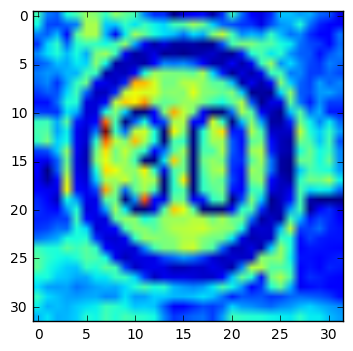

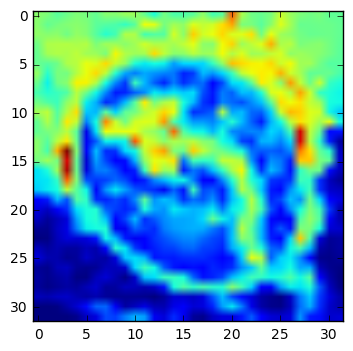

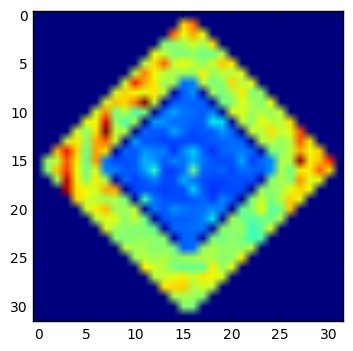

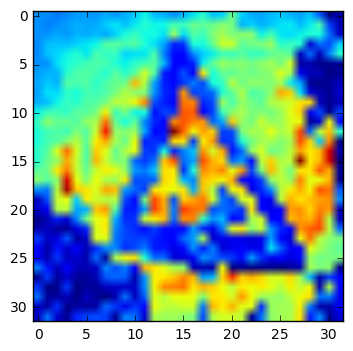

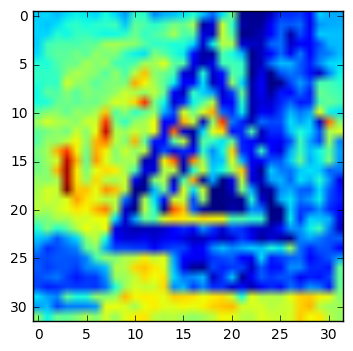

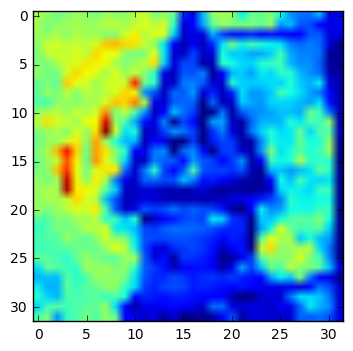

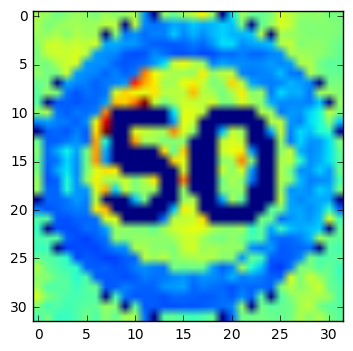

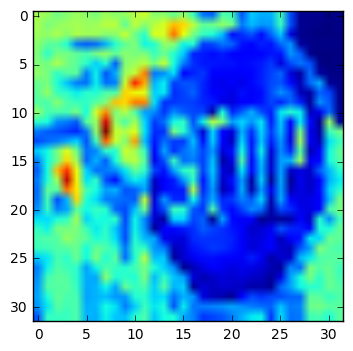

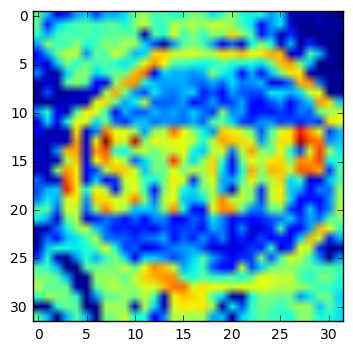

In [25]:
for image in images_test:
    plt.imshow(image.squeeze())
    plt.show()

### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Evaluating new sign images with saved training model. Also adding labels so we can see how model works.
# below you will see that if we change keep_prob: 0.5 accuracy increases. I would love to train model for this but 
# it would take a long time since i am doing it on CPU

labels = [1,34, 12, 25, 25, 28, 2, 14, 14]

with tf.Session() as sess:
    saver.restore(sess, ('./mcdnn_cifar'))
    new_accuracy = evaluate(images_test, labels)
    print("New Images Accuracy = {:.3f}".format(new_accuracy))

New Images Accuracy = 0.667


In [27]:
# Testing data within previous model to see will it predict better
# Testing tf.nn.top_k
# Model does not make sense due its same as above :)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./mcdnn_cifar.meta') # add correct graph
    saver.restore(sess, "./mcdnn_cifar")
    num_examples = len(images)
    
    new_softmax_logits = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(new_softmax_logits, k=3)
    
    print()
    sess.run(new_softmax_logits, feed_dict={x: images_test, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: images_test, keep_prob: 1.0})
    #print('shape',my_top_k[0])
    print()
    #print(my_top_k[0])
    for i in range(9):
        print('Top 3 largest probabilities', my_top_k[0][i]) # Printing first row to see probabilites
        print('Accuracy for image {} : '.format(i+1), my_top_k[0][i][0]*100, '%') # Printing first row first item



Top 3 largest probabilities [  9.99059260e-01   9.39751335e-04   8.33503350e-07]
Accuracy for image 1 :  99.9059259892 %
Top 3 largest probabilities [  1.00000000e+00   4.26131574e-10   5.84181101e-16]
Accuracy for image 2 :  100.0 %
Top 3 largest probabilities [  1.00000000e+00   1.07461122e-18   5.74002142e-23]
Accuracy for image 3 :  100.0 %
Top 3 largest probabilities [ 0.96365786  0.03386487  0.00247646]
Accuracy for image 4 :  96.3657855988 %
Top 3 largest probabilities [  9.98667955e-01   7.97871733e-04   2.66173272e-04]
Accuracy for image 5 :  99.8667955399 %
Top 3 largest probabilities [ 0.79864061  0.17153642  0.0109647 ]
Accuracy for image 6 :  79.8640608788 %
Top 3 largest probabilities [  9.99819458e-01   9.19139202e-05   3.13450219e-05]
Accuracy for image 7 :  99.9819457531 %
Top 3 largest probabilities [ 0.59855062  0.24148785  0.1049203 ]
Accuracy for image 8 :  59.8550617695 %
Top 3 largest probabilities [  1.00000000e+00   2.59115125e-12   3.17947437e-14]
Accuracy f

In [29]:
# Playing with data
# Testing data within previous model to see will it predict better
# Model does not make sense due its same as above :)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./mcdnn_cifar.meta')
    saver.restore(sess, "./mcdnn_cifar")
    num_examples = len(images)
    
    new_softmax_logits = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(new_softmax_logits, k=3)
    
    print("Training...")
    print()
    for i in range(9):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            sess.run(new_softmax_logits, feed_dict={x: images_test, keep_prob: 1.5})
            my_top_k = sess.run(top_k, feed_dict={x: images_test, keep_prob: 1.0})
            print(my_top_k[0][i][0])
        #validation_accuracy = evaluate(images_test, labels)
        #print("EPOCH {} ...".format(i+1))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print()   

Training...

0.999059
1.0
1.0
0.963658
0.998668
0.798641
0.999819
0.598551
1.0


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

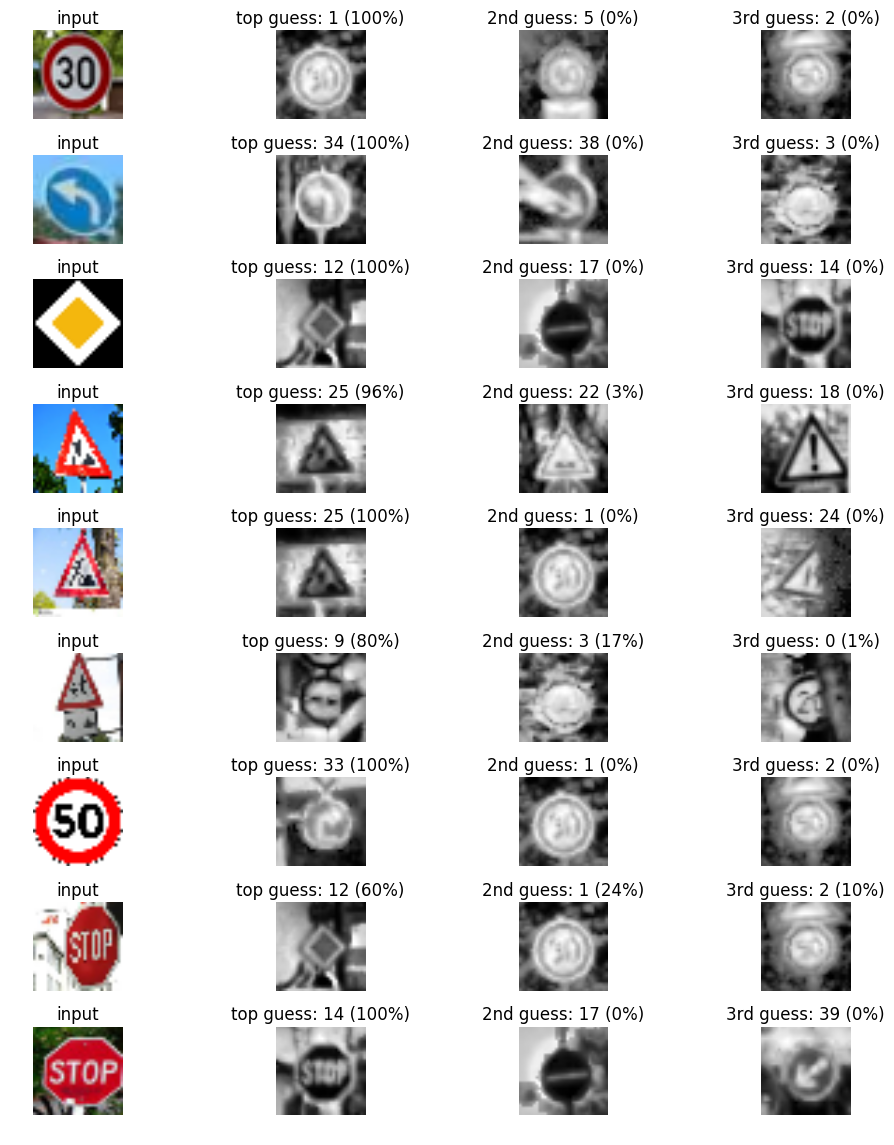

In [30]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
### I have changed Dropout in this model and i see improvement in accuracy compering to model used and saved

### Some of the ideas in this code i used from Medium blog post: 
### https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc#.txtoc558b
### https://chatbotslife.com/intricacies-of-traffic-sign-classification-with-tensorflow-8f994b1c8ba#.iuvl3gg82
### https://medium.com/@jeremyeshannon/udacity-self-driving-car-nanodegree-project-2-traffic-sign-classifier-f52d33d4be9f#.bspkhwstf

softmax_logits = tf.nn.softmax(logits)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./mcdnn_cifar.meta')
    saver.restore(sess, "./mcdnn_cifar")
    new_softmax_logits = sess.run(softmax_logits, feed_dict={x: images_test, keep_prob: 1.0})
    new_top_k = sess.run(top_k, feed_dict={x: images_test, keep_prob: 1.0})
    
    fig, axs = plt.subplots(len(images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = new_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*new_top_k[0][i][0]))
        guess2 = new_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*new_top_k[0][i][1]))
        guess3 = new_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*new_top_k[0][i][2]))

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [6]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

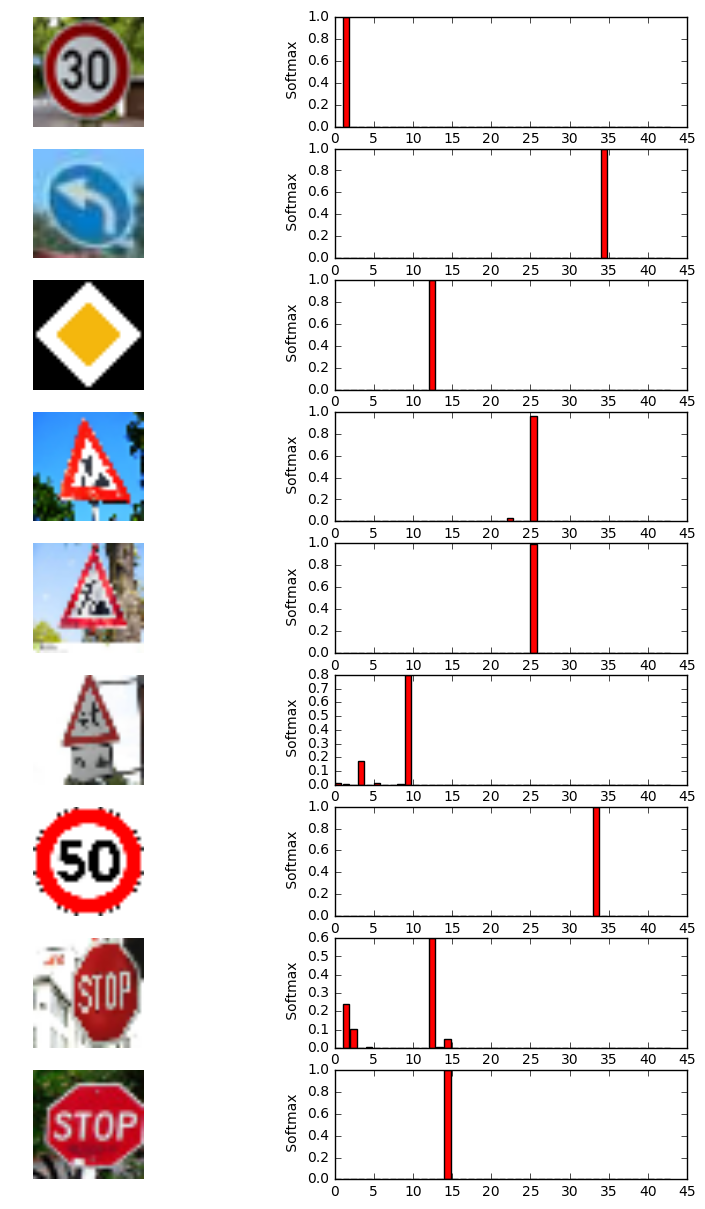

In [42]:
# Imporved softmay representation per review of my submited project

fig, axs = plt.subplots(9,2, figsize=(10, 15))
axs = axs.ravel()

for i in range(len(new_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), new_softmax_logits[(i-1)//2],color='r') 
        axs[i].set_ylabel(' Softmax')

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 